In [1]:
# Ignores warnings
import warnings
warnings.filterwarnings('ignore')

The data set that will be used for this assignment is from Kaggle. The data set contains daily weather data dating back to January 2, 1833. There are different weather features such as average temperature, precipitation, snowfall, and windspeed. Using this data, an analysis can be conducted on the cities with the highest temperatures and precipitation. With that, another analysis can be done on the correlation between highest temperatures and precipitation. The other variables can be analyzed as well to see where there is a strong correlation.

In [2]:
%%capture
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read Data
df = pd.read_parquet('daily_weather.parquet')

In [4]:
# See types of data in the dataframe
df.dtypes

station_id                      category
city_name                       category
date                      datetime64[us]
season                          category
avg_temp_c                       float64
min_temp_c                       float64
max_temp_c                       float64
precipitation_mm                 float64
snow_depth_mm                    float64
avg_wind_dir_deg                 float64
avg_wind_speed_kmh               float64
peak_wind_gust_kmh               float64
avg_sea_level_pres_hpa           float64
sunshine_total_min               float64
dtype: object

To begin analysis, the daily data will be condensed. In condensing the data, the weather information can be grouped by city and the average can be used for the records of each city. These averages can be compared against each other to identify the cities with the highest average temperature and highest precipitation. 

In [5]:
# Removes columns that will not be needed 
df = df.drop(columns=['date', 'season', 'station_id'])
# Group by City and keep the average of all the other columns
df = df.groupby('city_name', as_index=False).mean()

To being analyzing the data, a boxplot will provide information briefly.

In [6]:
# Include only numeric columns
numeric_df = df.select_dtypes(include='number')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'avg_temp_c'),
  Text(2, 0, 'min_temp_c'),
  Text(3, 0, 'max_temp_c'),
  Text(4, 0, 'precipitation_mm'),
  Text(5, 0, 'snow_depth_mm'),
  Text(6, 0, 'avg_wind_dir_deg'),
  Text(7, 0, 'avg_wind_speed_kmh'),
  Text(8, 0, 'peak_wind_gust_kmh'),
  Text(9, 0, 'avg_sea_level_pres_hpa'),
  Text(10, 0, 'sunshine_total_min')])

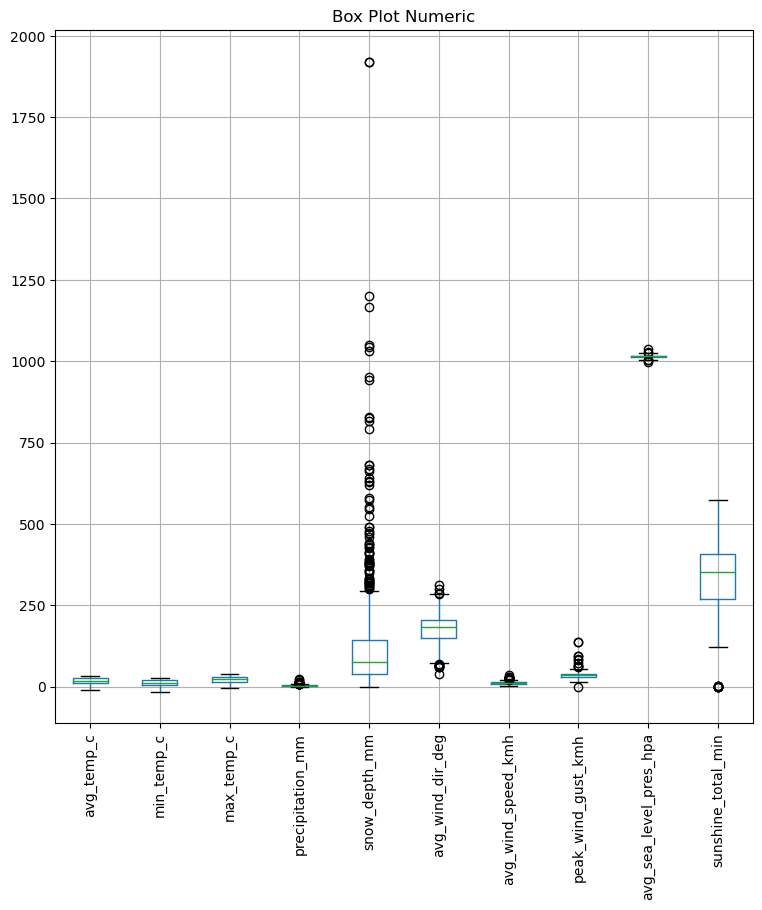

In [7]:
# Create box plot of numeric columns
fig, ax = plt.subplots(figsize=(9,9))
numeric_df.boxplot()
plt.title('Box Plot Numeric')
plt.xticks(rotation='vertical')

The box plot above shows the range of values for each numeric column. While the temperature features do not have many outliers, many of the other columns do. 

The next analysis will be the identification of cities with highest temperature and precipitation. This will be the initial exploration conducted. 

In [8]:
# Display condensed data
df.head()

,city_name,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
0,Aalborg,8.446398,4.918725,12.154636,1.720538,84.011940,194.719795,17.857968,37.512105,1013.098820,NaN
1,Abakan,1.255078,-5.134430,8.305084,0.945714,70.451124,180.673496,9.583867,NaN,1019.813316,NaN
2,Abha,19.038089,12.827580,26.002377,1.535775,82.444444,189.687686,11.237608,NaN,1023.230209,NaN
3,Abidjan,26.825537,24.255334,30.256598,7.016129,NaN,220.238225,11.005686,NaN,1011.633735,NaN
4,Aboisso,26.578839,23.254564,30.790712,6.730680,NaN,221.421923,8.928542,NaN,1011.454912,NaN


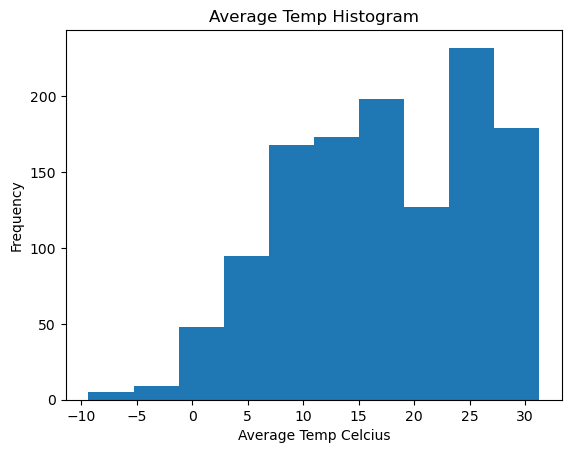

In [9]:
# Create the histogram of average temperature
df['avg_temp_c'].plot.hist()

# Set the title and labels
plt.xlabel('Average Temp Celcius')
plt.ylabel('Frequency')
plt.title('Average Temp Histogram')

# Show the histogram
plt.show()

frequently. The cities that will have the highest temperature will most likely be around the 30-degree area while most of the data lies between 10 and 25 degrees.

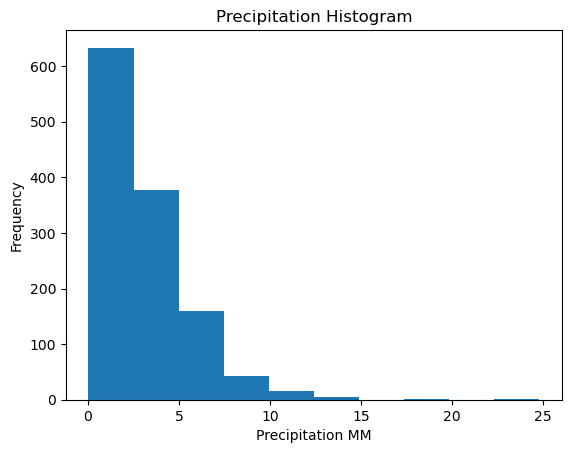

In [10]:
# Create the histogram of precipitation
df['precipitation_mm'].plot.hist()

# Set the title and labels
plt.xlabel('Precipitation MM')
plt.ylabel('Frequency')
plt.title('Precipitation Histogram')

# Show the histogram
plt.show()

The next histogram shows precipitation values. While most values lie on the lower end, there are instances of where precipitation is around 23-24 MM, our highest city will be around this value. Most of the other instances are between 0 and 5 MM.

Next, the top 5 cities with highest temperature and precipitation will be identified. 

In [11]:
# Sorts by highest average temperature
sorted_df = df.sort_values('avg_temp_c', ascending=False)

# Select the top five hottest cities
top_five_hot = sorted_df.head(5)
top_five_hot.head()

,city_name,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
316,Faya-Largeau,31.273885,21.763654,36.484530,0.820839,NaN,74.351603,22.367942,NaN,1011.401448,NaN
489,Kaédi,30.680517,23.749891,38.279725,2.815126,NaN,171.621510,10.240951,NaN,1010.351913,NaN
453,Jizan,30.532035,26.332298,35.328779,1.312630,NaN,235.544625,11.200192,NaN,1008.536223,NaN
960,Sana'a,30.532035,26.332298,35.328779,1.312630,NaN,235.544625,11.200192,NaN,1008.536223,NaN
499,Khartoum,30.315657,23.285576,37.309168,4.228306,NaN,220.234894,16.877336,NaN,1009.110282,NaN


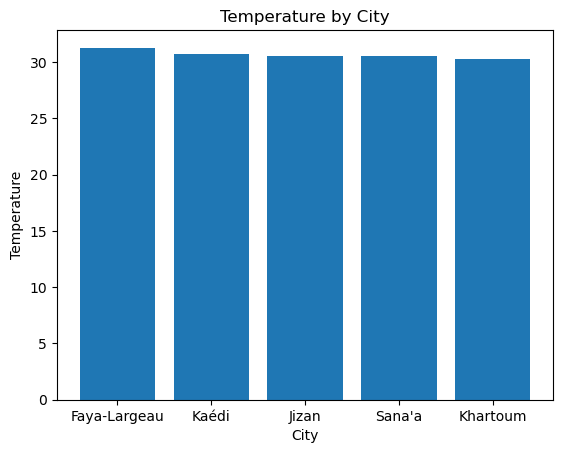

In [12]:
# Bar graph of top five average temperature
plt.bar(top_five_hot['city_name'], top_five_hot['avg_temp_c'])
plt.xlabel('City')
plt.ylabel('Temperature')
plt.title('Temperature by City')
plt.show()

With the data sorted, the cities with the highest average temperature can be seen in a bar graph. As expected, these cities are all near 30 degrees Celsius. The warmest city being Faya-Largeau.

In [13]:
# Sorts by highest precipitation
sorted_df2 = df.sort_values('precipitation_mm', ascending=False)

# Select the top five cities with most precipitation
top_five_precip = sorted_df2.head(5)
top_five_precip.head()

,city_name,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
1011,Sittwe,26.770286,21.139597,30.714661,24.810530,NaN,231.098986,6.316581,NaN,1008.572887,NaN
880,Quibdó,26.956106,23.051960,31.179869,19.615247,NaN,167.866598,5.319442,NaN,1010.562254,NaN
517,Koh Kong,27.543732,23.207816,31.535806,14.102803,NaN,142.016546,7.556153,NaN,1009.871355,NaN
889,Ranong,27.635593,21.784572,31.146913,13.855543,NaN,159.984488,12.311789,NaN,1009.907446,NaN
18,Aizawl,25.646565,20.898830,30.956178,13.308412,NaN,154.910729,6.394758,NaN,1007.914839,NaN


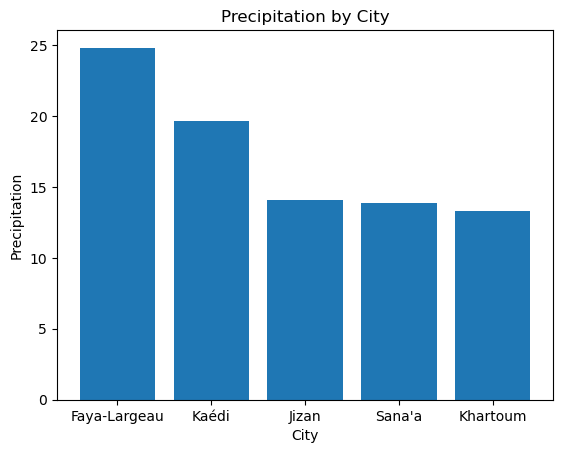

In [14]:
# Bar graph of five countries with most precipitation
plt.bar(top_five_hot['city_name'], top_five_precip['precipitation_mm'])
plt.xlabel('City')
plt.ylabel('Precipitation')
plt.title('Precipitation by City')
plt.show()

The cities with the highest precipitation are displayed above. These cities have precipitation levels ranging from 13 MM to 24 MM. The city with the most precipitation being Sittwe.

Next, an analysis is conducted on the correlation between the two. This can be done using a scatter plot. 

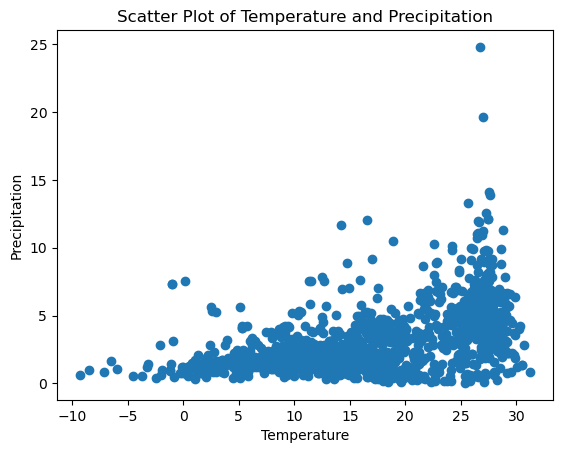

In [15]:
# Create a scatter plot of average temperature and precipitation
plt.scatter(df['avg_temp_c'], df['precipitation_mm'])

# Set the labels for the x-axis and y-axis
plt.xlabel('Temperature')
plt.ylabel('Precipitation')

# Set the title of the plot
plt.title('Scatter Plot of Temperature and Precipitation')

# Display the scatter plot
plt.show()

As seen in the scatter plot, there is a slight correlation between temperature and precipitation. The points are ascending and shifting to the right side in a positive direction.

To further understand correlation, all the columns can be analyzed to understand their relation to one another. 

In [16]:
# Import libraries
import seaborn as sn

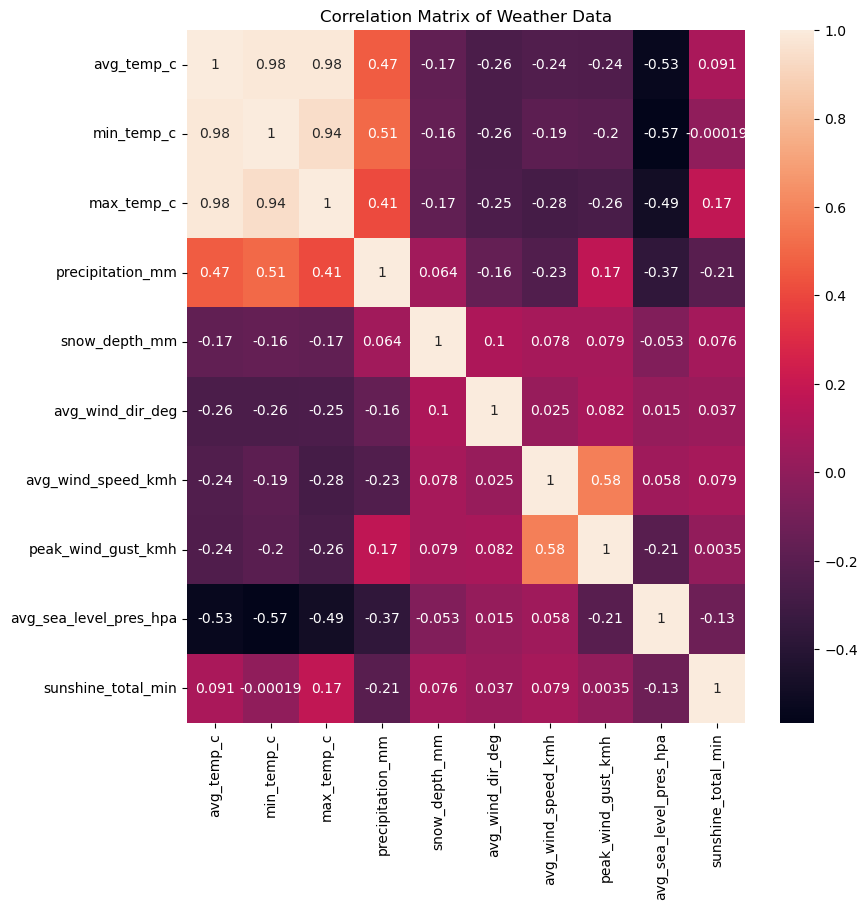

In [19]:
# Create correlation matrix of numeric columns
fig, ax = plt.subplots(figsize=(9,9))
corr_matrix = numeric_df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix of Weather Data')

plt.show()

The data provides a representation of weather of different cities over time, and it shows that the warmest city is Faya-Largeau and the city with the most precipitation is Sittwe. This is based on the average over time with the data provided. The bar graphs created demonstrates this for both cities. When understanding the correlation between temperature and precipitation, the scatterplot shows that there is a slight correlation, and the correlation matrix confirms this. Since the correlation coefficient of temperature and precipitation is 0.47, this indicates a moderate correlation between the two.